## Model Training

### Data Reading

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
df = pd.read_csv("Final Data/df_final.csv")

In [3]:
df.head()

,DATE,consumer_confidence_index,consumer_price_index,emratio,GDP,house_start,income,median_sales_price,mortgage_rate,population,target,unemployed_rate
0,2004-01-01,103.8,186.3,62.3,0.000,3822.0,9731.8,212700.0,5.7125,292046.0,141.646,5.7
1,2004-01-31,0.0,0.0,0.0,11923.447,0.0,0.0,0.0,0.0000,0.0,0.000,0.0
2,2004-02-01,94.4,186.7,62.3,0.000,3692.0,9765.4,212700.0,5.6350,292230.0,143.191,5.6
3,2004-02-29,0.0,0.0,0.0,11923.447,0.0,0.0,0.0,0.0000,0.0,0.000,0.0
4,2004-03-01,95.8,187.1,62.2,0.000,3996.0,9815.8,212700.0,5.4450,292434.0,145.058,5.8


### Data splitting and Scaling

In [4]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [21]:
lasso_cv_model = LassoCV(alphas=np.logspace(-8, 4, 200),cv=5, max_iter=20000)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

In [22]:
optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0000
Mean Squared Error (MSE): 68.93
RMSE: 8.302545
R-squared (R2): 0.99


### Cross validation

In [23]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99626546 0.99481963 0.99584466 0.99491084 0.96678429]


In [24]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9897
Standard Deviation of R-squared: 0.0115


In [25]:
print(0.1 * rmse)
print(0.1 * df['target'].mean()) # rmse should be less than the 10% of mean of target variable

0.8302545437339761
9.128008661417324


### Most Prominent features and least prominent features

In [26]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [27]:
non_zero_coefficients_df

,Feature,Coefficient
0,consumer_confidence_index,-46.409475
1,consumer_price_index,-56.440373
2,emratio,-16.675320
3,GDP,2.849799
4,house_start,22.443087
5,income,47.405535
6,median_sales_price,45.116225
7,mortgage_rate,4.368718
8,population,114.015016
9,unemployed_rate,-10.348133


In [29]:
zero_coefficients_df

,Feature,Coefficient


### Predicted vs Observed

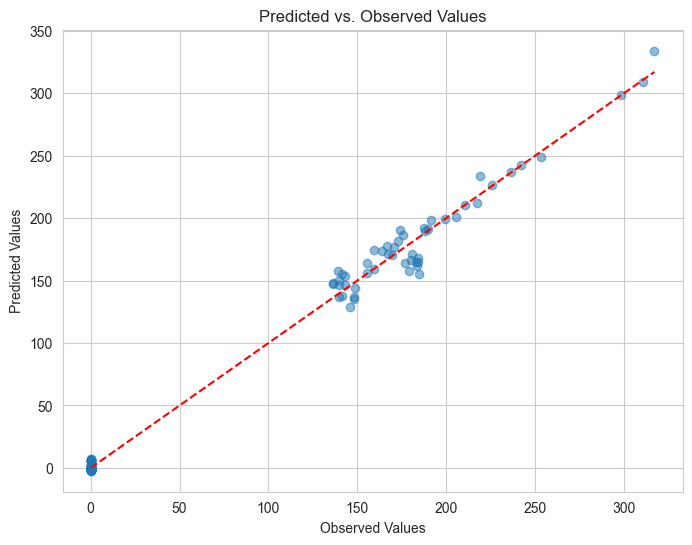

In [30]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()